# Experiment 2


# Import libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.optimize import curve_fit

: 

# Load dataset from CSV

In [32]:
data = pd.read_csv('social_media_entertainment_data.csv')
data.head(
    
)

,User ID,Age,Gender,Country,Daily Social Media Time (hrs),Daily Entertainment Time (hrs),Social Media Platforms Used,Primary Platform,Daily Messaging Time (hrs),Daily Video Content Time (hrs),...,Ad Interaction Count,Time on Educational Platforms (hrs),Parental Status,Tech Savviness Level (scale 1-10),Preferred Device for Entertainment,Data Plan Used,Digital Well-being Awareness,Sleep Quality (scale 1-10),Social Isolation Feeling (scale 1-10),Monthly Expenditure on Entertainment (USD)
0,1,32,Other,Germany,4.35,4.08,5,TikTok,0.35,5.43,...,20,4.11,Yes,9,Tablet,50GB,Moderate,7,8,33.04
1,2,62,Other,India,4.96,4.21,2,YouTube,2.55,4.22,...,26,4.59,Yes,9,PC,10GB,Low,8,2,497.78
2,3,51,Female,USA,6.78,1.77,4,Facebook,2.09,1.09,...,47,0.66,Yes,9,Tablet,10GB,High,5,3,71.72
3,4,44,Female,India,5.06,9.21,3,YouTube,3.69,4.80,...,22,3.44,Yes,7,Tablet,10GB,Low,9,9,129.62
4,5,21,Other,Germany,2.57,1.30,4,TikTok,3.97,2.74,...,42,4.14,Yes,7,Smart TV,Unlimited,Low,5,9,35.90


In [39]:
data_subset = data[['Country', 'Primary Platform', 'Parental Status']]

data_subset = data_subset.dropna()
data_subset.columns = ['Country', 'Primary Platform', 'Parental Status']
data_subset.head()

,Country,Primary Platform,Parental Status
0,Germany,TikTok,Yes
1,India,YouTube,Yes
2,USA,Facebook,Yes
3,India,YouTube,Yes
4,Germany,TikTok,Yes


In [42]:
X = data_subset['Primary Platform'].values.reshape(-1, 1)  # Independent variable (e.g., Platform)
y = data_subset['Parental status'].values  # Dependent variable (e.g., Data Plan Used)


KeyError: 'Parental status'

# Linear Regression

In [43]:
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear = linear_model.predict(X)

ValueError: could not convert string to float: 'TikTok'

# Non-linear curve fitting
# Define a quadratic function for non-linear regression

In [18]:
def quadratic(x, a, b, c):
    return a * x**2 + b * x + c

In [19]:
params, _ = curve_fit(quadratic, X.flatten(), y)
a, b, c = params
y_pred_nonlinear = quadratic(X.flatten(), a, b, c)


# Error Calculation

In [20]:
mse_linear = mean_squared_error(y, y_pred_linear)
mae_linear = mean_absolute_error(y, y_pred_linear)

mse_nonlinear = mean_squared_error(y, y_pred_nonlinear)
mae_nonlinear = mean_absolute_error(y, y_pred_nonlinear)


# Display results

In [27]:
print("Linear Regression Results:")
print(f"  Coefficients: {linear_model.coef_}")
print(f"  Intercept: {linear_model.intercept_}")
print(f"  MSE: {mse_linear:.3f}")
print(f"  MAE: {mae_linear:.3f}")

print("\nNon-linear Regression Results:")
print(f"  Parameters (a, b, c): {params}")
print(f"  MSE: {mse_nonlinear:.3f}")
print(f"  MAE: {mae_nonlinear:.3f}")

Linear Regression Results:


AttributeError: 'LinearRegression' object has no attribute 'coef_'

# Plot results

In [23]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

# Original data

In [24]:
plt.scatter(X, y, color="black", label="Original Data")

NameError: name 'X' is not defined

# Linear regression line

In [26]:
plt.plot(X, y_pred_linear, color="blue", label="Linear Regression")

NameError: name 'X' is not defined

# Non-linear regression curve

In [25]:
plt.plot(X, y_pred_nonlinear, color="red", label="Non-linear Regression (Quadratic)")

NameError: name 'X' is not defined

# Labels

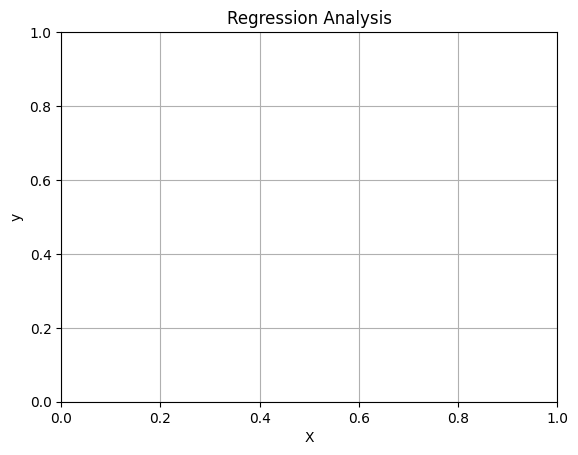

In [26]:
plt.title("Regression Analysis")
plt.xlabel("X")
plt.ylabel("y")
plt.grid()
plt.show()